<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor


### Introduction

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.

### Step 1: Data Loading and Preprocessing

#### Task 1: Load the League of Legends dataset and preprocess it for training.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
%%time
%pip install pandas scikit-learn matplotlib
%pip install torch==2.8.0+cpu torchvision==0.23.0+cpu torchaudio==2.8.0+cpu \
    --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.9.0+cu126
    Uninstalling torch-2.9.0+cu126:
      Successfully uninstalled torch-2.9.0+cu126
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.24.0+cu126
    Uninstalling torchvision-0.24.0+cu126:
      Successfully uninstalled torchvision-0.24.0+cu126
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.9.0+cu126
    Uninstalling torchaudio-2.9.0+cu126:
      Successfully uninstalled torchaudio-2.9.0+cu126
CPU times: user 3.25 s, sys: 477 ms, total: 3.72 s
Wall time: 46.6 s


In [2]:
import pandas as pd
data = pd.read_csv('/content/league_of_legends_data_large.csv')

In [3]:
X = data.drop('win', axis=1)
y = data['win']

# print the first few rows of the data
display(X.head())

# print the first few rows of the target
display(y.head())

,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,16,6,19,17088,231,11,7,15367
1,8,8,5,14865,259,10,2,38332
2,0,17,11,15919,169,14,5,24642
3,19,11,1,11534,264,14,3,15789
4,12,7,6,18926,124,15,7,40268


,win
0,0
1,1
2,0
3,0
4,0


In [4]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (1000, 8)'

'y shape: (1000,)'

In [5]:
display(y.value_counts())

,count
win,
1,510
0,490


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

from torch.utils.data import DataLoader, TensorDataset

# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) # Change to float32 and unsqueeze
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)   # Change to float32 and unsqueeze

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

'X_train shape: (800, 8)'

'y_train shape: (800,)'

'X_test shape: (200, 8)'

'y_test shape: (200,)'

### Step 2: Logistic Regression Model

#### Task 2: Implement a logistic regression model using PyTorch.

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1) # Output is 1 for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Assuming X_train is available from previous steps
# If not, ensure the previous cell (r3yt3J-Xk-Nk) is run first.
input_dim = X_train.shape[1]

# Initialize the model, loss function, and optimizer
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


### Step 3: Model Training

#### Task 3: Train the logistic regression model on the dataset.

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.


In [8]:
epochs = 1000 # Set number of epochs to 1000
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch) # y_batch already float and unsqueezed from previous step
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch) # y_batch already float and unsqueezed from previous step
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Model Evaluation after training
model.eval()
with torch.no_grad():
    # Predictions on training set
    train_outputs = model(X_train)
    train_predicted = (train_outputs > 0.5).float()
    train_accuracy = (train_predicted == y_train).float().mean().item()

    # Predictions on test set
    test_outputs = model(X_test)
    test_predicted = (test_outputs > 0.5).float()
    test_accuracy = (test_predicted == y_test).float().mean().item()

print(f'\nTraining Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Train Loss: 0.6948, Test Loss: 0.6795
Epoch [200/1000], Train Loss: 0.6951, Test Loss: 0.6855
Epoch [300/1000], Train Loss: 0.6956, Test Loss: 0.6825
Epoch [400/1000], Train Loss: 0.6953, Test Loss: 0.6849
Epoch [500/1000], Train Loss: 0.6951, Test Loss: 0.6834
Epoch [600/1000], Train Loss: 0.6954, Test Loss: 0.6826
Epoch [700/1000], Train Loss: 0.6954, Test Loss: 0.6856
Epoch [800/1000], Train Loss: 0.6948, Test Loss: 0.6835
Epoch [900/1000], Train Loss: 0.6952, Test Loss: 0.6838
Epoch [1000/1000], Train Loss: 0.6947, Test Loss: 0.6841

Training Accuracy: 0.5375
Test Accuracy: 0.5550


### Step 4: Model Optimization and Evaluation

#### Task 4: Implement optimization techniques and evaluate the model's performance.

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.


In [9]:
import torch.optim as optim

# Reinitialize the model to ensure a clean slate for retraining
# This is important if we want to compare performance with and without regularization
model_l2 = LogisticRegressionModel(input_dim)
criterion_l2 = nn.BCELoss()

# Set up the optimizer with L2 regularization (weight_decay)
optimizer_l2 = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.01)

epochs_l2 = 1000 # Use the same number of epochs as before for fair comparison

train_losses_l2 = []
test_losses_l2 = []

print("\n--- Training with L2 Regularization ---")
for epoch in range(epochs_l2):
    # Training phase
    model_l2.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer_l2.zero_grad()
        outputs = model_l2(X_batch)
        loss = criterion_l2(outputs, y_batch)
        loss.backward()
        optimizer_l2.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses_l2.append(train_loss)

    # Evaluation phase on test set
    model_l2.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_l2(X_batch)
            loss = criterion_l2(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses_l2.append(test_loss)

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs_l2}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Model Evaluation after training with L2 regularization
model_l2.eval()
with torch.no_grad():
    # Predictions on training set
    train_outputs_l2 = model_l2(X_train)
    train_predicted_l2 = (train_outputs_l2 > 0.5).float()
    train_accuracy_l2 = (train_predicted_l2 == y_train).float().mean().item()

    # Predictions on test set
    test_outputs_l2 = model_l2(X_test)
    test_predicted_l2 = (test_outputs_l2 > 0.5).float()
    test_accuracy_l2 = (test_predicted_l2 == y_test).float().mean().item()

print(f'\nTraining Accuracy with L2 Regularization: {train_accuracy_l2:.4f}')
print(f'Test Accuracy with L2 Regularization: {test_accuracy_l2:.4f}')



--- Training with L2 Regularization ---
Epoch [100/1000], Train Loss: 0.6949, Test Loss: 0.6801
Epoch [200/1000], Train Loss: 0.6958, Test Loss: 0.6854
Epoch [300/1000], Train Loss: 0.6953, Test Loss: 0.6862
Epoch [400/1000], Train Loss: 0.6955, Test Loss: 0.6809
Epoch [500/1000], Train Loss: 0.6950, Test Loss: 0.6815
Epoch [600/1000], Train Loss: 0.6949, Test Loss: 0.6794
Epoch [700/1000], Train Loss: 0.6952, Test Loss: 0.6853
Epoch [800/1000], Train Loss: 0.6952, Test Loss: 0.6839
Epoch [900/1000], Train Loss: 0.6950, Test Loss: 0.6862
Epoch [1000/1000], Train Loss: 0.6948, Test Loss: 0.6859

Training Accuracy with L2 Regularization: 0.5362
Test Accuracy with L2 Regularization: 0.5400


### Step 5: Visualization and Interpretation

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error.

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC:
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


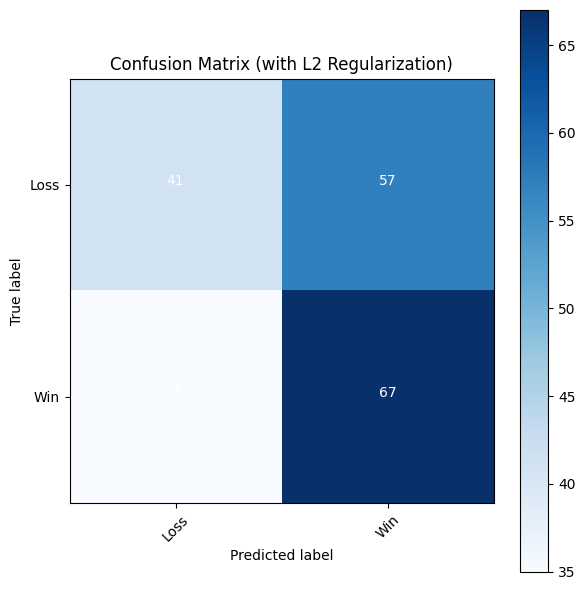

Classification Report (with L2 Regularization):
               precision    recall  f1-score   support

        Loss       0.54      0.42      0.47        98
         Win       0.54      0.66      0.59       102

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



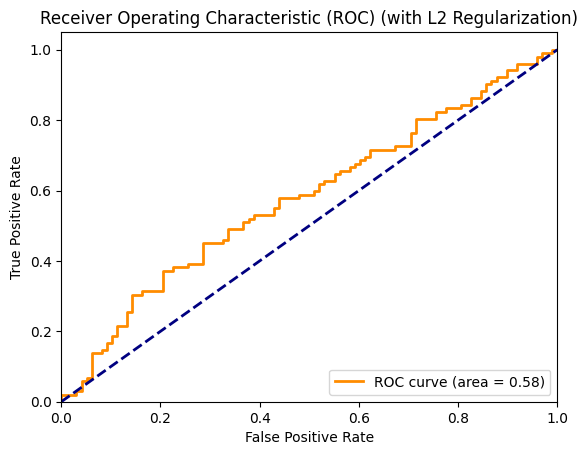

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Set model_l2 to evaluation mode
model_l2.eval()

# Get predictions from the model trained with L2 regularization on the test set
with torch.no_grad():
    test_outputs_l2 = model_l2(X_test)
    # Convert probabilities to binary predictions using a 0.5 threshold
    y_pred_test_labels_l2 = (test_outputs_l2 > 0.5).float()
    # Convert to numpy for sklearn metrics
    y_test_np = y_test.cpu().numpy()
    y_pred_test_labels_l2_np = y_pred_test_labels_l2.cpu().numpy()
    y_pred_test_scores_l2_np = test_outputs_l2.cpu().numpy()

# Visualize the confusion matrix
cm = confusion_matrix(y_test_np, y_pred_test_labels_l2_np)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (with L2 Regularization)')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report (with L2 Regularization):\n", classification_report(y_test_np, y_pred_test_labels_l2_np, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_test_scores_l2_np)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (with L2 Regularization)')
plt.legend(loc="lower right")
plt.show()


Double-click <b>here</b> for the Hint.
<!--

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading

#### Task 6: Save and load the trained model.

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.


In [11]:
# 1. Saving the Model
model_save_path = 'logistic_regression_model_l2.pth'
torch.save(model_l2.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# 2. Loading the Model
# Create a new model instance with the same input dimensions
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load(model_save_path))
print("Model loaded successfully.")

# 3. Evaluating the Loaded Model
loaded_model.eval()
with torch.no_grad():
    # Predictions on test set using the loaded model
    loaded_test_outputs = loaded_model(X_test)
    loaded_test_predicted = (loaded_test_outputs > 0.5).float()
    loaded_test_accuracy = (loaded_test_predicted == y_test).float().mean().item()

print(f'Test Accuracy of loaded model: {loaded_test_accuracy:.4f}')


Model saved to logistic_regression_model_l2.pth
Model loaded successfully.
Test Accuracy of loaded model: 0.5400


### Step 7: Hyperparameter Tuning

#### Task 7: Perform hyperparameter tuning to find the best learning rate.

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.


In [12]:
learning_rates = [0.01, 0.05, 0.1]
best_accuracy = 0
best_lr = 0

print("\n--- Hyperparameter Tuning for Learning Rate ---")

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")

    # Reinitialize the model and optimizer for each learning rate
    model_tuned = LogisticRegressionModel(input_dim)
    criterion_tuned = nn.BCELoss()
    optimizer_tuned = optim.SGD(model_tuned.parameters(), lr=lr, weight_decay=0.01)

    epochs_tuned = 100 # Train for a fixed number of epochs for tuning

    for epoch in range(epochs_tuned):
        model_tuned.train()
        for X_batch, y_batch in train_loader:
            optimizer_tuned.zero_grad()
            outputs = model_tuned(X_batch)
            loss = criterion_tuned(outputs, y_batch)
            loss.backward()
            optimizer_tuned.step()

        if (epoch + 1) % 50 == 0:
            print(f'  Epoch [{epoch + 1}/{epochs_tuned}], Loss: {loss.item():.4f}')

    # Evaluate the model after training with the current learning rate
    model_tuned.eval()
    with torch.no_grad():
        test_outputs_tuned = model_tuned(X_test)
        test_predicted_tuned = (test_outputs_tuned > 0.5).float()
        current_accuracy = (test_predicted_tuned == y_test).float().mean().item()

    print(f'Test Accuracy for LR {lr}: {current_accuracy:.4f}')

    # Check if this learning rate yielded the best accuracy
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_lr = lr

print(f"\nBest Learning Rate: {best_lr:.4f} with Test Accuracy: {best_accuracy:.4f}")



--- Hyperparameter Tuning for Learning Rate ---

Training with Learning Rate: 0.01
  Epoch [50/100], Loss: 0.7597
  Epoch [100/100], Loss: 0.7139
Test Accuracy for LR 0.01: 0.5250

Training with Learning Rate: 0.05
  Epoch [50/100], Loss: 0.7771
  Epoch [100/100], Loss: 0.6813
Test Accuracy for LR 0.05: 0.5000

Training with Learning Rate: 0.1
  Epoch [50/100], Loss: 0.7541
  Epoch [100/100], Loss: 0.6025
Test Accuracy for LR 0.1: 0.5600

Best Learning Rate: 0.1000 with Test Accuracy: 0.5600


### Step 8: Feature Importance

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.


Feature Importance (sorted by absolute value):
         Feature  Importance
7  damage_dealt   -0.093025
5  wards_placed    0.075760
0         kills    0.057451
3   gold_earned    0.044324
1        deaths    0.040593
4            cs   -0.003902
6  wards_killed    0.002738
2       assists    0.001256


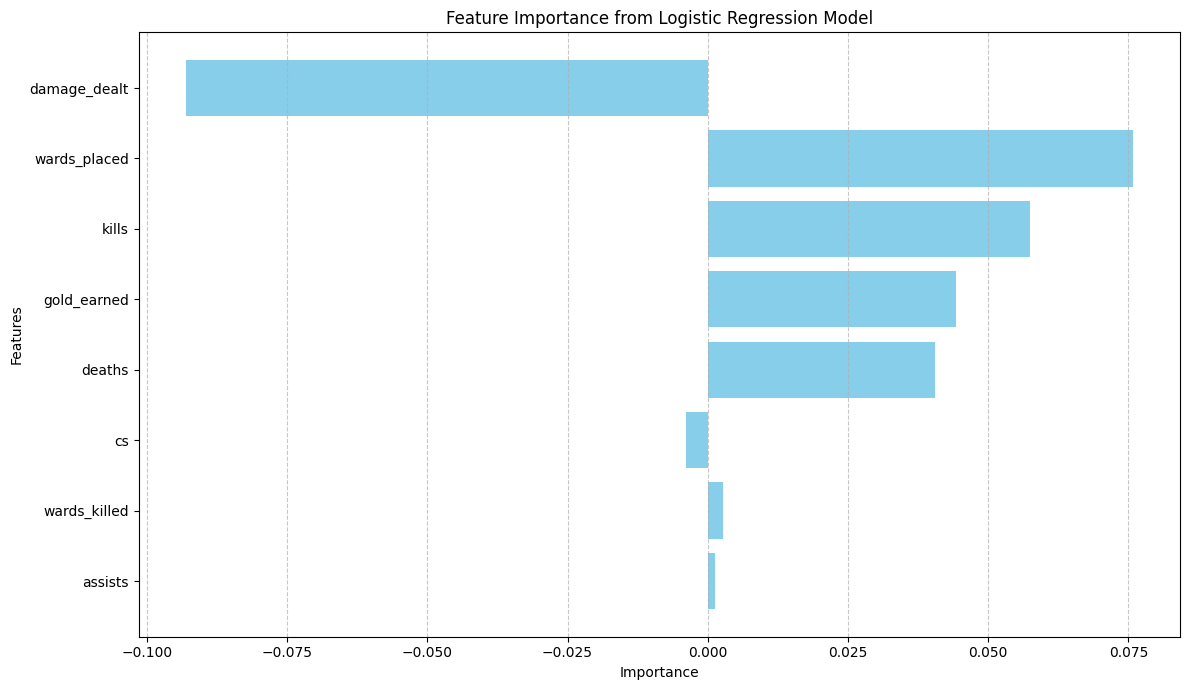

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer from the best performing model (model_l2 in this case)
# We use the model that was trained with L2 regularization
weights = model_l2.linear.weight.data.numpy().flatten()

# Get the feature names from the original DataFrame X
features = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})

# Sort the features by their absolute importance for better visualization
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

print("Feature Importance (sorted by absolute value):\n", feature_importance[['Feature', 'Importance']])

# Plot feature importance
plt.figure(figsize=(12, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis() # Invert y-axis to have most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Double-click <b>here</b> for the Hint
<!--
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
